In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("e-commerce_transaction_data.csv")
data = data.sample(frac=1, random_state=1)
data.head(5)

Transaction ID  \
334709   0ea57c75-ef76-4527-ba6e-1f31b949454b   
777013   58d42b2e-8981-4cf8-88a8-6735b3fdaab6   
31162    967d0e13-b859-4322-acda-cd1ecfb7c73a   
786421   ce1b70d7-591c-4eaa-b3c4-2cf2a315ab06   
1001265  67284e01-b240-4506-ae25-4c03c894eded   

                                  Customer ID  Transaction Amount  \
334709   044e1d07-a5d2-40d4-bea3-044d18a1d94a              221.97   
777013   1c83d1bf-742c-4a2a-b2d8-55f22ba68074              131.60   
31162    c9e05819-f76b-41ba-95c4-7ee45119a9a4              449.43   
786421   1c03c277-a8af-4a9c-a008-0c0768a4d835              460.02   
1001265  c17c8c36-d4ee-4960-abf0-701dcce56f3d               18.58   

            Transaction Date Payment Method Product Category  Quantity  \
334709   2024-01-11 08:35:29     debit card      electronics         1   
777013   2024-04-02 15:38:33         PayPal         clothing         2   
31162    2024-02-15 11:39:56         PayPal     toys & games         4   
786421   2024-03-31 05:54:24         PayPal  health & beauty         1   
1001265  2024-04-01 10:27:41         PayPal    home & garden         5   

         Customer Age Customer Location Device Used      IP Address  \
334709             49      Thompsonbury     desktop  105.23.106.140   
777013             37  East Melindastad      tablet   212.95.116.99   
31162              12         North Amy      mobile     2.33.221.37   
786421             30       Rachelville      tablet   33.92.106.174   
1001265            29  North Kevinburgh      tablet   121.44.202.49   

                                          Shipping Address  \
334709          113 Mary Loaf\nNorth Timothystad, CT 92430   
777013   43214 Catherine Cape Apt. 945\nNorth Stephen, ...   
31162    09847 Andrade Mission Suite 811\nNew James, SD...   
786421     04230 Matthew Ports\nLake Anthonytown, HI 20531   
1001265  6925 Curtis Springs Suite 045\nCollinsshire, N...   

                                           Billing Address  Is Fraudulent  \
334709          113 Mary Loaf\nNorth Timothystad, CT 92430              0   
777013   43214 Catherine Cape Apt. 945\nNorth Stephen, ...              0   
31162     22633 Perkins Plains\nPort Barbarafort, CA 08807              0   
786421     04230 Matthew Ports\nLake Anthonytown, HI 20531              0   
1001265       43356 Frazier Union\nNew Erichaven, NE 42271              0   

         Account Age Days  Transaction Hour  
334709                135                 8  
777013                  7                15  
31162                 133                11  
786421                229                 5  
1001265               131                10

In [3]:
data.describe()

Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        1.472952e+06  1.472952e+06  1.472952e+06   1.472952e+06   
mean         2.267683e+02  3.000230e+00  3.451208e+01   5.012926e-02   
std          2.703951e+02  1.414736e+00  1.000313e+01   2.182117e-01   
min          1.000000e+01  1.000000e+00 -1.600000e+01   0.000000e+00   
25%          6.861000e+01  2.000000e+00  2.800000e+01   0.000000e+00   
50%          1.517600e+02  3.000000e+00  3.500000e+01   0.000000e+00   
75%          2.960500e+02  4.000000e+00  4.100000e+01   0.000000e+00   
max          1.270175e+04  5.000000e+00  8.600000e+01   1.000000e+00   

       Account Age Days  Transaction Hour  
count      1.472952e+06      1.472952e+06  
mean       1.796464e+02      1.128696e+01  
std        1.068642e+02      6.975995e+00  
min        1.000000e+00      0.000000e+00  
25%        8.600000e+01      5.000000e+00  
50%        1.790000e+02      1.100000e+01  
75%        2.720000e+02      1.700000e+01  
max        3.650000e+02      2.300000e+01

In [4]:
data.shape

(1472952, 16)

In [5]:
data.columns.values

array(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category',
       'Quantity', 'Customer Age', 'Customer Location', 'Device Used',
       'IP Address', 'Shipping Address', 'Billing Address',
       'Is Fraudulent', 'Account Age Days', 'Transaction Hour'],
      dtype=object)

In [6]:
data["Is Fraudulent"] = data["Is Fraudulent"].astype("category")
data["Quantity"] = data["Quantity"].astype("category")

In [7]:
data["Is Fraudulent"].value_counts(normalize = True).to_frame().T

0         1
Is Fraudulent  0.949871  0.050129

In [8]:
data.isnull().sum().to_frame()

0
Transaction ID      0
Customer ID         0
Transaction Amount  0
Transaction Date    0
Payment Method      0
Product Category    0
Quantity            0
Customer Age        0
Customer Location   0
Device Used         0
IP Address          0
Shipping Address    0
Billing Address     0
Is Fraudulent       0
Account Age Days    0
Transaction Hour    0

In [9]:
cat_features = ['Product Category','Payment Method', 'Device Used', 'Quantity']
num_features = ['Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour']

data[cat_features].nunique().to_frame()

0
Product Category  5
Payment Method    4
Device Used       3
Quantity          5

In [10]:
import matplotlib.pyplot as plt

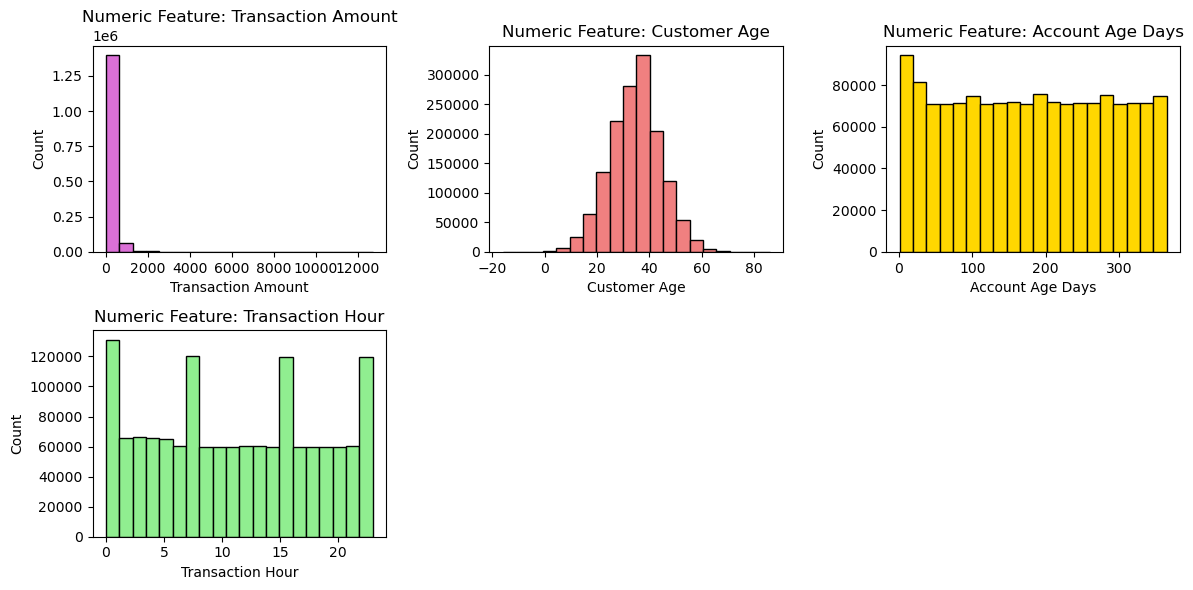

In [11]:
palette = ['orchid', 'lightcoral', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

plt.figure(figsize=[12, 6])
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i + 1)
    plt.hist(data.loc[:, col], bins=20, color=palette[i], edgecolor='k')
    plt.title(f'Numeric Feature: {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.savefig("num_histograms.png")

In [12]:
import seaborn as sns

#sns.pairplot(data, hue = "anomaly", diag_kind="hist")

CPU times: total: 10min 46s
Wall time: 11min 26s


<Figure size 800x600 with 0 Axes>

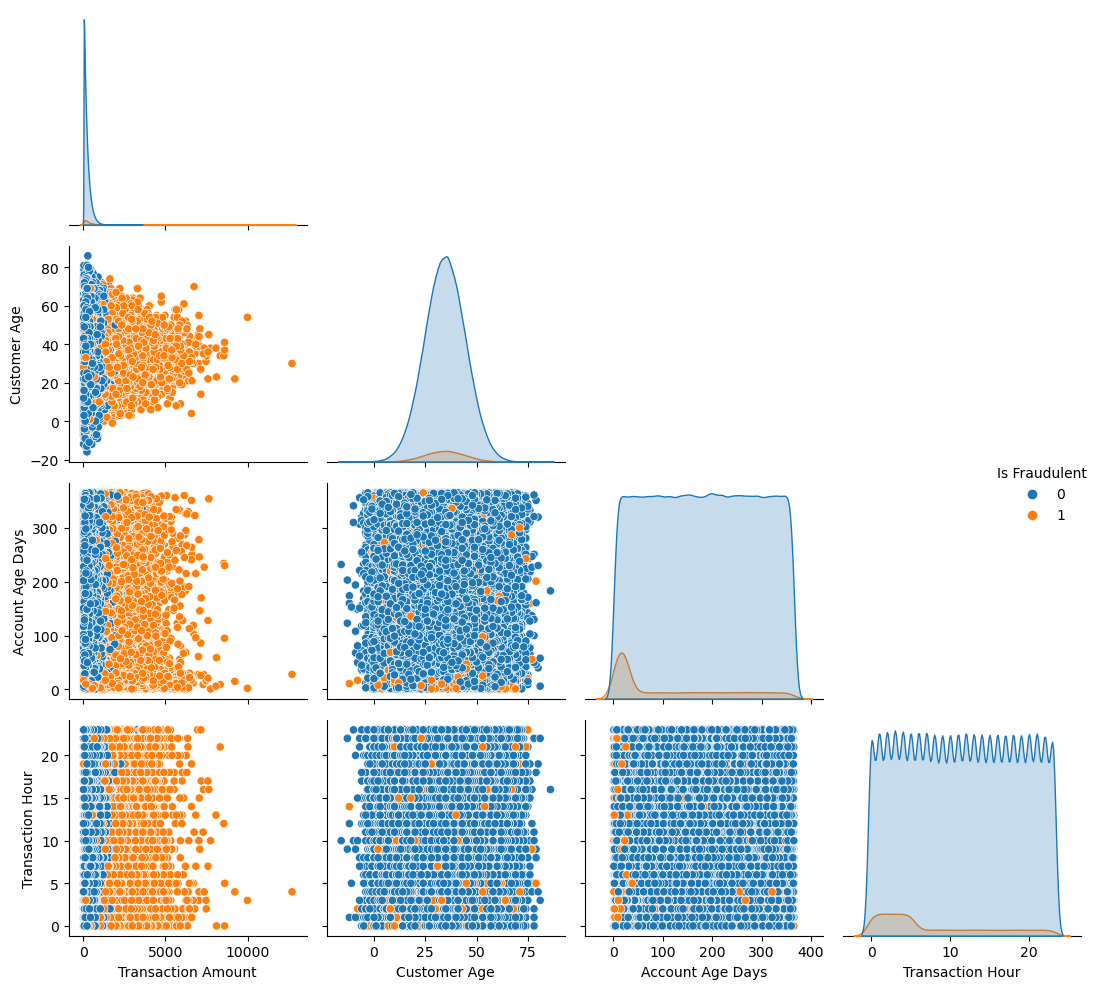

In [13]:
%%time
plt.figure(figsize=[8,6])
sns.pairplot(data, hue = "Is Fraudulent", corner=True)
plt.tight_layout()
plt.savefig("pairplot.png")

In [14]:
import plotly.express as px
import plotly.graph_objects as go


correlation_matrix = data.corr()

fig = go.Figure()
fig_corr_heatmap = px.imshow(correlation_matrix, title = "Correlation Heatmap")
fig_corr_heatmap.show()
fig.write_image("heatmap.png")

C:\Users\MRT\AppData\Local\Temp\ipykernel_15664\2668828135.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [15]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

correlation_matrix = data.corr()
fig = px.imshow(correlation_matrix, title = "Correlation Heatmap")

app.layout = html.Div([
    html.H4('Analysis of Transaction data using Correlation Heatmap'),
    dcc.Graph(id="graph",
              figure=fig),
])

if __name__ == '__main__':
    app.run(debug=True)

C:\Users\MRT\AppData\Local\Temp\ipykernel_15664\988447081.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Model Training and Evaluation
Import the required libraries

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

In [17]:
X = data.loc[:, ['Product Category','Payment Method', 'Device Used',
                 'Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']]
y = data["Is Fraudulent"]

#encoder_y = LabelEncoder()
#encoder_y.fit(["low_risk", "moderate_risk", "high_risk"])
#y = encoder_y.transform(y)

#### Splitting of the data

In [18]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.50, stratify=y_hold, random_state=1)

print(f'''
Training Features Shape:   {X_train.shape}
Validation Features Shape: {X_valid.shape}
Test Features Shape:       {X_test.shape}
''')


Training Features Shape:   (1031066, 8)
Validation Features Shape: (220943, 8)
Test Features Shape:       (220943, 8)



#### Preprocessing

In [19]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')
scaler = StandardScaler()

preprocessor_1 = ColumnTransformer(
    transformers = [
        ('num', scaler, num_features),
        ('cat', encoder, cat_features)
    ]
)

X_train_1 = preprocessor_1.fit_transform(X_train)
X_valid_1 = preprocessor_1.transform(X_valid)
X_test_1 = preprocessor_1.transform(X_test)

print(f'''
Training Features Shape after preprocessing:   {X_train_1.shape}
Validation Features Shape after preprocessing: {X_valid_1.shape}
Test Features Shape after preprocessing:       {X_test_1.shape}
''')


Training Features Shape after preprocessing:   (1031066, 21)
Validation Features Shape after preprocessing: (220943, 21)
Test Features Shape after preprocessing:       (220943, 21)



### Base Model

In [20]:
rf_train_acc = []
rf_valid_acc = []
depth_range = range(2, 10)

for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X_train_1, y_train)
    rf_train_acc.append(temp_forest.score(X_train_1, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid_1, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = list(depth_range)[rf_idx]

print(f'''
Optimal value for max_depth:           {rf_opt_depth}
Training Accuracy for Optimal Model:   {np.round(rf_train_acc[rf_idx], 4)}
Validation Accuracy for Optimal Model: {np.round(rf_valid_acc[rf_idx], 4)}
''')


Optimal value for max_depth:           9
Training Accuracy for Optimal Model:   0.9556
Validation Accuracy for Optimal Model: 0.9553



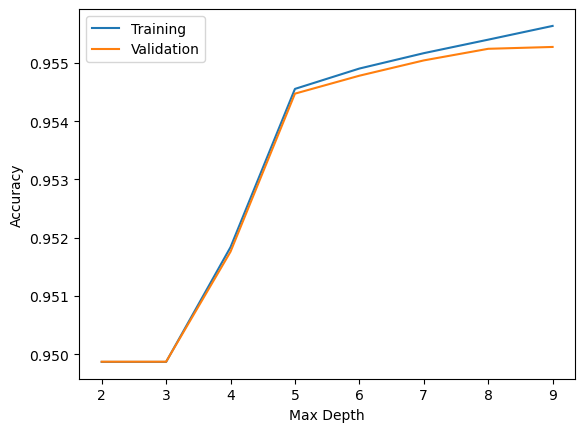

In [21]:
plt.plot(list(depth_range), rf_train_acc, label='Training')
plt.plot(list(depth_range), rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

In [22]:
np.random.seed(1)
base_model = RandomForestClassifier(max_depth=9, n_estimators=100)
base_model.fit(X_train_1, y_train)

print(f'''
Training Accuracy for Base Model:   {np.round(base_model.score(X_train_1, y_train), 4)}
Validation Accuracy for Base Model: {np.round(base_model.score(X_valid_1, y_valid), 4)}
Testing Accuracy for Base Model:    {np.round(base_model.score(X_test_1, y_test), 4)}
''')


Training Accuracy for Base Model:   0.9556
Validation Accuracy for Base Model: 0.9553
Testing Accuracy for Base Model:    0.9552



In [23]:
test_pred = base_model.predict(X_test_1)
matrix = confusion_matrix(y_test, test_pred)

rf_matrix = pd.DataFrame(matrix, index=["legitimate", "fraudulent"],
                         columns=["legitimate", "fraudulent"])
rf_matrix

legitimate  fraudulent
legitimate      209683         184
fraudulent        9722        1354

In [24]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    209867
           1       0.88      0.12      0.21     11076

    accuracy                           0.96    220943
   macro avg       0.92      0.56      0.60    220943
weighted avg       0.95      0.96      0.94    220943



### Cross-Validation of Base model

In [25]:
%%time
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)

rf_parameters = {
    'max_depth': [2, 4, 6, 8, 12, 16],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_srch = GridSearchCV(rf_clf, rf_parameters, cv=10, refit='True', n_jobs=-1)
rf_grid_srch.fit(X_train_1, y_train)

rf_mod = rf_grid_srch.best_estimator_

print(f'Best Parameters: {rf_grid_srch.best_params_}')
print(f'Best CV Score:   {rf_grid_srch.best_score_:.4f}')
print(f'Training Acc:    {rf_grid_srch.score(X_train_1, y_train):.4f}')

Best Parameters: {'max_depth': 16, 'min_samples_leaf': 4}
Best CV Score:   0.9556
Training Acc:    0.9575
CPU times: total: 28min 55s
Wall time: 2h 3min 8s


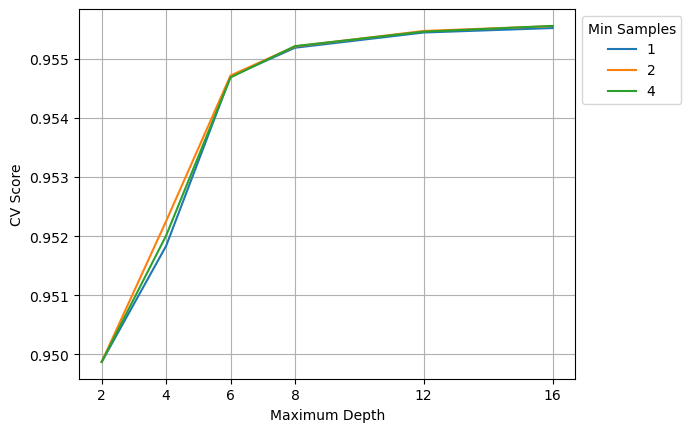

In [26]:
rf_summary = pd.DataFrame(rf_grid_srch.cv_results_['params'])
rf_summary['cv_score'] = rf_grid_srch.cv_results_['mean_test_score']

for ms in rf_parameters['min_samples_leaf']:
    temp = rf_summary.query(f'min_samples_leaf == {ms}')
    plt.plot(temp.max_depth, temp.cv_score, label=ms)
plt.xlabel('Maximum Depth')
plt.ylabel('CV Score')
plt.legend(title='Min Samples', bbox_to_anchor=[1,1])
plt.xticks(rf_parameters['max_depth'])
plt.grid()
plt.show()

## Logistic Regression

In [27]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)
lr_mod.fit(X_train_1, y_train)
print(f'''
Training Accuracy:   {np.round(lr_mod.score(X_train_1, y_train), 4)}
Validation Accuracy: {np.round(lr_mod.score(X_valid_1, y_valid), 4)}
''')


Training Accuracy:   0.9548
Validation Accuracy: 0.9548



In [28]:
scores = cross_val_score(lr_mod, X_train_1, y_train, cv=5)
print(scores)
print(scores.mean())

[0.95494486 0.954901   0.95450335 0.9549107  0.95466338]
0.9547846596045224


In [29]:
test_pred = lr_mod.predict(X_test_1)
matrix = confusion_matrix(y_test, test_pred)

lr_matrix = pd.DataFrame(matrix, index=["legitimate", "fraudulent"],
                         columns=["legitimate", "fraudulent"])
lr_matrix

legitimate  fraudulent
legitimate      209672         195
fraudulent        9822        1254

In [30]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    209867
           1       0.87      0.11      0.20     11076

    accuracy                           0.95    220943
   macro avg       0.91      0.56      0.59    220943
weighted avg       0.95      0.95      0.94    220943



## Under-sampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_hold, y_train, y_hold = train_test_split(X_resampled, y_resampled, test_size=0.30,
                                                    stratify=y_resampled, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.50, stratify=y_hold, random_state=1)

print(f'''
Training Features Shape:   {X_train.shape}
Validation Features Shape: {X_valid.shape}
Test Features Shape:       {X_test.shape}
''')


Training Features Shape:   (103373, 8)
Validation Features Shape: (22151, 8)
Test Features Shape:       (22152, 8)



In [32]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')
scaler = StandardScaler()

preprocessor_2 = ColumnTransformer(
    transformers = [
        ('num', scaler, num_features),
        ('cat', encoder, cat_features)
    ]
)

X_train_2 = preprocessor_2.fit_transform(X_train)
X_valid_2 = preprocessor_2.transform(X_valid)
X_test_2 = preprocessor_2.transform(X_test)

print(f'''
Training Features Shape after preprocessing:   {X_train_2.shape}
Validation Features Shape after preprocessing: {X_valid_2.shape}
Test Features Shape after preprocessing:       {X_test_2.shape}
''')


Training Features Shape after preprocessing:   (103373, 21)
Validation Features Shape after preprocessing: (22151, 21)
Test Features Shape after preprocessing:       (22152, 21)



In [33]:
%%time

rf_train_acc = []
rf_valid_acc = []
depth_range = range(2, 15)

for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X_train_2, y_train)
    rf_train_acc.append(temp_forest.score(X_train_2, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid_2, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = list(depth_range)[rf_idx]

print(f'''
Optimal value for max_depth:           {rf_opt_depth}
Training Accuracy for Optimal Model:   {np.round(rf_train_acc[rf_idx], 4)}
Validation Accuracy for Optimal Model: {np.round(rf_valid_acc[rf_idx], 4)}
''')


Optimal value for max_depth:           12
Training Accuracy for Optimal Model:   0.7874
Validation Accuracy for Optimal Model: 0.7442

CPU times: total: 1min 47s
Wall time: 1min 53s


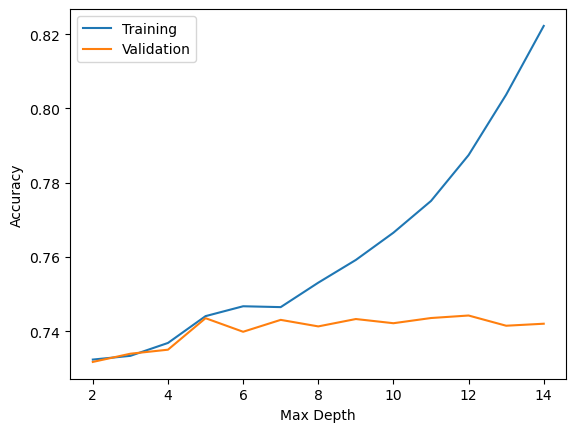

In [34]:
plt.plot(list(depth_range), rf_train_acc, label='Training')
plt.plot(list(depth_range), rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

In [35]:
np.random.seed(1)
base_model = RandomForestClassifier(max_depth=11, n_estimators=100)
base_model.fit(X_train_2, y_train)

print(f'''
Training Accuracy for Base Model:   {np.round(base_model.score(X_train_2, y_train), 4)}
Validation Accuracy for Base Model: {np.round(base_model.score(X_valid_2, y_valid), 4)}
Testing Accuracy for Base Model:    {np.round(base_model.score(X_test_2, y_test), 4)}
''')


Training Accuracy for Base Model:   0.7751
Validation Accuracy for Base Model: 0.7435
Testing Accuracy for Base Model:    0.7436



In [36]:
test_pred = base_model.predict(X_test_2)
matrix = confusion_matrix(y_test, test_pred)

rf_matrix = pd.DataFrame(matrix, index=["legitimate", "fraudulent"],
                         columns=["legitimate", "fraudulent"])
rf_matrix

legitimate  fraudulent
legitimate        8743        2333
fraudulent        3347        7729

In [37]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     11076
           1       0.77      0.70      0.73     11076

    accuracy                           0.74     22152
   macro avg       0.75      0.74      0.74     22152
weighted avg       0.75      0.74      0.74     22152



### Logistic Regression with Under Sampling

In [38]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)
lr_mod.fit(X_train_2, y_train)
print(f'''
Training Accuracy:   {np.round(lr_mod.score(X_train_2, y_train), 4)}
Validation Accuracy: {np.round(lr_mod.score(X_valid_2, y_valid), 4)}
''')


Training Accuracy:   0.6951
Validation Accuracy: 0.6954



In [39]:
scores = cross_val_score(lr_mod, X_train_2, y_train, cv=5)
print(scores.mean())

0.6947462606883222


In [40]:
test_pred = lr_mod.predict(X_test_2)
matrix = confusion_matrix(y_test, test_pred)

lr_matrix = pd.DataFrame(matrix, index=["legitimate", "fraudulent"],
                         columns=["legitimate", "fraudulent"])
lr_matrix

legitimate  fraudulent
legitimate        8027        3049
fraudulent        3726        7350

In [41]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     11076
           1       0.71      0.66      0.68     11076

    accuracy                           0.69     22152
   macro avg       0.69      0.69      0.69     22152
weighted avg       0.69      0.69      0.69     22152



### Over-sampling

In [43]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_Oresampled, y_Oresampled = ros.fit_resample(X, y)

X_train, X_hold, y_train, y_hold = train_test_split(X_Oresampled, y_Oresampled, test_size=0.30,
                                                    stratify=y_Oresampled, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.50, stratify=y_hold, random_state=1)

print(f'''
Training Features Shape:   {X_train.shape}
Validation Features Shape: {X_valid.shape}
Test Features Shape:       {X_test.shape}
''')


Training Features Shape:   (1958759, 8)
Validation Features Shape: (419734, 8)
Test Features Shape:       (419735, 8)



In [44]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')
scaler = StandardScaler()

preprocessor_3 = ColumnTransformer(
    transformers = [
        ('num', scaler, num_features),
        ('cat', encoder, cat_features)
    ]
)

X_train_3 = preprocessor_3.fit_transform(X_train)
X_valid_3 = preprocessor_3.transform(X_valid)
X_test_3 = preprocessor_3.transform(X_test)

print(f'''
Training Features Shape after preprocessing:   {X_train_3.shape}
Validation Features Shape after preprocessing: {X_valid_3.shape}
Test Features Shape after preprocessing:       {X_test_3.shape}
''')


Training Features Shape after preprocessing:   (1958759, 21)
Validation Features Shape after preprocessing: (419734, 21)
Test Features Shape after preprocessing:       (419735, 21)



In [45]:
%%time

rf_train_acc = []
rf_valid_acc = []
depth_range = range(2, 15)

for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X_train_3, y_train)
    rf_train_acc.append(temp_forest.score(X_train_3, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid_3, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = list(depth_range)[rf_idx]

print(f'''
Optimal value for max_depth:           {rf_opt_depth}
Training Accuracy for Optimal Model:   {np.round(rf_train_acc[rf_idx], 4)}
Validation Accuracy for Optimal Model: {np.round(rf_valid_acc[rf_idx], 4)}
''')


Optimal value for max_depth:           14
Training Accuracy for Optimal Model:   0.7912
Validation Accuracy for Optimal Model: 0.7865

CPU times: total: 1h 12min 5s
Wall time: 1h 11min 21s


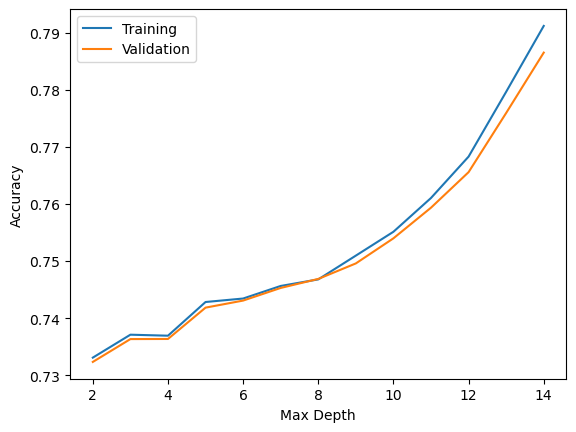

In [46]:
plt.plot(list(depth_range), rf_train_acc, label='Training')
plt.plot(list(depth_range), rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

In [48]:
np.random.seed(1)
base_model = RandomForestClassifier(max_depth=11, n_estimators=100)
base_model.fit(X_train_3, y_train)

print(f'''
Training Accuracy for Base Model:   {np.round(base_model.score(X_train_3, y_train), 4)}
Validation Accuracy for Base Model: {np.round(base_model.score(X_valid_3, y_valid), 4)}
Testing Accuracy for Base Model:    {np.round(base_model.score(X_test_3, y_test), 4)}
''')


Training Accuracy for Base Model:   0.7611
Validation Accuracy for Base Model: 0.7594
Testing Accuracy for Base Model:    0.7583



In [49]:
test_pred = base_model.predict(X_test_3)
matrix = confusion_matrix(y_test, test_pred)

rf_matrix = pd.DataFrame(matrix, index=["legitimate", "fraudulent"],
                         columns=["legitimate", "fraudulent"])
rf_matrix

legitimate  fraudulent
legitimate      169453       40414
fraudulent       61023      148845

In [50]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77    209867
           1       0.79      0.71      0.75    209868

    accuracy                           0.76    419735
   macro avg       0.76      0.76      0.76    419735
weighted avg       0.76      0.76      0.76    419735



### Logistic Regression on Oversampled data

In [51]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)
lr_mod.fit(X_train_3, y_train)
print(f'''
Training Accuracy:   {np.round(lr_mod.score(X_train_3, y_train), 4)}
Validation Accuracy: {np.round(lr_mod.score(X_valid_3, y_valid), 4)}
''')


Training Accuracy:   0.6969
Validation Accuracy: 0.6957



In [52]:
scores = cross_val_score(lr_mod, X_train_3, y_train, cv=5)
print(scores.mean())

0.696803945781026


In [53]:
test_pred = lr_mod.predict(X_test_3)
matrix = confusion_matrix(y_test, test_pred)

lr_matrix = pd.DataFrame(matrix, index=["legitimate", "fraudulent"],
                         columns=["legitimate", "fraudulent"])
lr_matrix

legitimate  fraudulent
legitimate      152698       57169
fraudulent       70251      139617

In [54]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71    209867
           1       0.71      0.67      0.69    209868

    accuracy                           0.70    419735
   macro avg       0.70      0.70      0.70    419735
weighted avg       0.70      0.70      0.70    419735

